<a href="https://colab.research.google.com/github/dheerajkumar1a1a/Kaggle_github/blob/main/tomato_Ranchi_prophet_univ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cufflinks as cf
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default='plotly_white'
import os
import plotly.io as pio
pio.renderers.default = 'colab'
import seaborn as sns
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
parent_df={}
parent_df['RANCHI']=pd.read_csv('complete_data.csv',index_col=0,parse_dates=[0])

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
# sns.lineplot(data=parent_df['RANCHI'])

parent_df['RANCHI'].iplot()

In [ ]:
px.line(parent_df['RANCHI'],x=parent_df['RANCHI'].index,y=['Retail Prices','Arrival Quantity'])

In [ ]:
df_Ranchi=parent_df['RANCHI'].copy()

In [ ]:
df_Ranchi['2011':'2012'].describe()

Arrival Quantity  Retail Prices    Min Price     Max Price  Modal Price
count        581.000000     581.000000   581.000000    581.000000   581.000000
mean          21.803787    1725.301205   773.290878   1045.101549   887.122203
std           12.005001     989.847665   358.530626    673.625644   401.998182
min            1.000000     500.000000   150.000000    245.000000   200.000000
25%           16.000000    1000.000000   400.000000    600.000000   500.000000
50%           22.000000    1600.000000   800.000000   1000.000000   900.000000
75%           28.000000    2400.000000  1100.000000   1400.000000  1200.000000
max          220.000000   18000.000000  2100.000000  13004.000000  2250.000000

In [ ]:
df_Ranchi['2011':'2014']['Retail Prices'].iplot()

In [ ]:
df_Ranchi_1=df_Ranchi.copy()
df_Ranchi.isnull().sum()

Arrival Quantity    2514
Retail Prices       2514
Min Price           2514
Max Price           2514
Modal Price         2514
dtype: int64

In [ ]:
# https://www.ceicdata.com/en/india/retail-price-department-of-agriculture-and-cooperation-food-by-cities-tomato/retail-price-doac-tomato-jharkhand-ranchi
# above is the source provided to prove that 18k price is an outlier

df_Ranchi_1=df_Ranchi_1[df_Ranchi_1['Retail Prices']<10000]
df_Ranchi_1.isnull().sum()
# df_Ranchi['Retail Prices'].iplot()

Arrival Quantity    0
Retail Prices       0
Min Price           0
Max Price           0
Modal Price         0
dtype: int64

In [ ]:
df_Ranchi_1.describe()

Arrival Quantity  Retail Prices     Min Price     Max Price  \
count       4955.000000    4955.000000   4955.000000   4955.000000   
mean          30.675479    1660.663976    883.508451   1181.890817   
std           31.214018    1274.568686    619.449365    811.838715   
min            0.000000       0.000000      0.375000     70.000000   
25%           15.000000     800.000000    400.000000    600.000000   
50%           25.000000    1500.000000    750.000000   1000.000000   
75%           40.000000    2500.000000   1150.000000   1555.000000   
max         1100.000000    9000.000000  11250.000000  13004.000000   

        Modal Price  
count   4955.000000  
mean    1017.507972  
std      715.991548  
min        0.000000  
25%      480.000000  
50%      850.000000  
75%     1300.000000  
max    12500.000000

In [ ]:
df_Ranchi=df_Ranchi['2010':'2020'].copy()


In [ ]:
df_Ranchi_1=df_Ranchi_1['2010':'2020'].copy()
df_Ranchi_1.isnull().sum()

Arrival Quantity    0
Retail Prices       0
Min Price           0
Max Price           0
Modal Price         0
dtype: int64

In [ ]:
df_Ranchi_dropped=df_Ranchi_1.dropna()

In [ ]:
df_Ranchi_dropped['Arrival Quantity']['2020'].iplot()

In [ ]:
df_Ranchi_dropped.iplot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

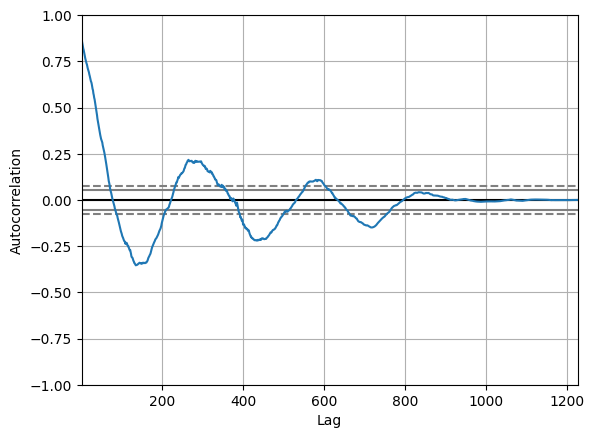

In [ ]:
pd.plotting.autocorrelation_plot(df_Ranchi_dropped['2016':'2020']['Arrival Quantity'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

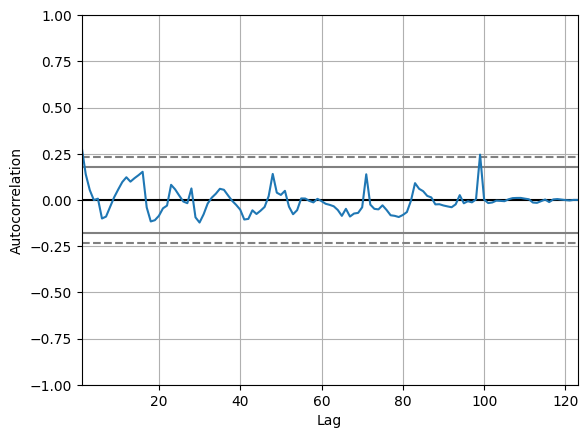

In [ ]:
pd.plotting.autocorrelation_plot(df_Ranchi_dropped['2010':'2020']['Arrival Quantity'].resample('1m').max())

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

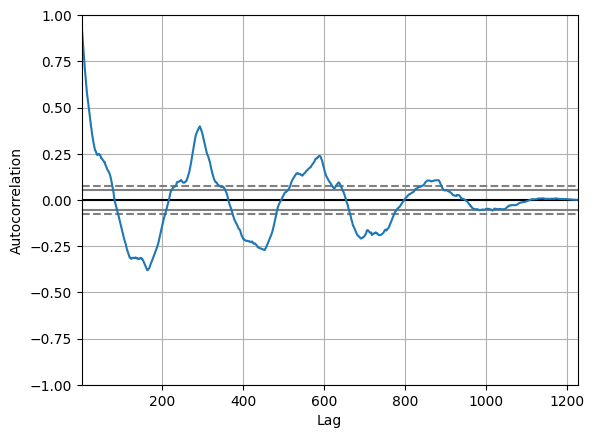

In [ ]:
pd.plotting.autocorrelation_plot(df_Ranchi_dropped['2016':'2020']['Retail Prices'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

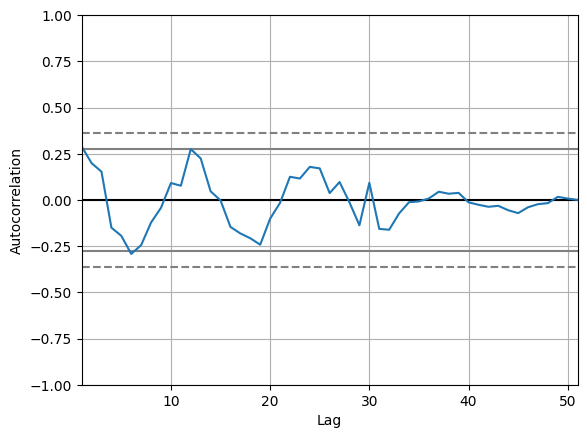

In [ ]:
pd.plotting.autocorrelation_plot(df_Ranchi_dropped['2016':'2020']['Retail Prices'].resample('1m').max())

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

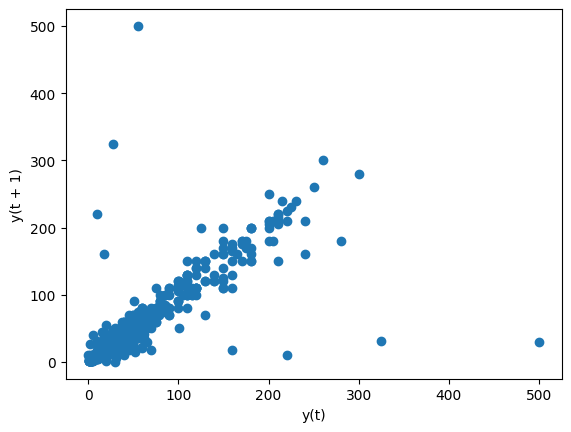

In [ ]:
pd.plotting.lag_plot(df_Ranchi_1['Arrival Quantity'],lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

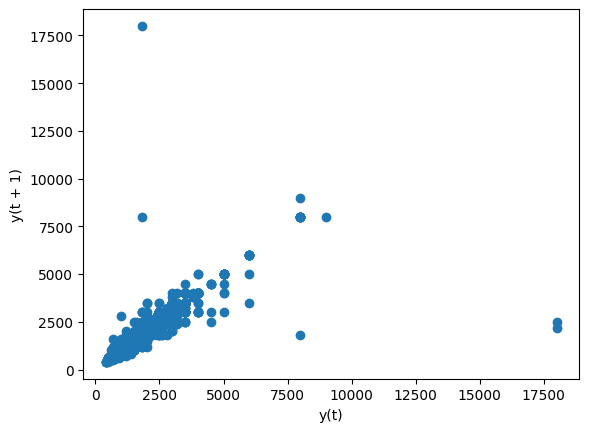

In [ ]:
pd.plotting.lag_plot(df_Ranchi['Retail Prices'],lag=1)

In [ ]:
from statsmodels.tsa.stattools import adfuller


# In[19]:


test_result=adfuller(df_Ranchi_dropped['Arrival Quantity'])


# In[20]:


#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(df_Ranchi_dropped['Arrival Quantity'])

ADF Test Statistic : -4.458886636578286
p-value : 0.00023315692057715757
#Lags Used : 8
Number of Observations Used : 2920
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
adfuller_test(df_Ranchi_dropped['Retail Prices'])

ADF Test Statistic : -6.349668420161004
p-value : 2.6298274177566954e-08
#Lags Used : 1
Number of Observations Used : 2927
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
df_Ranchi.isnull().sum()

Arrival Quantity    882
Retail Prices       882
Min Price           882
Max Price           882
Modal Price         882
dtype: int64

In [ ]:
df_Ranchi_imp=pd.DataFrame()
df_Ranchi_imp['Retail Prices']=df_Ranchi['Retail Prices'].rolling(window=5,min_periods=2).mean().fillna(method='ffill')
df_Ranchi_imp['Arrival Quantity']=df_Ranchi['Arrival Quantity'].rolling(window=5,min_periods=2).mean().fillna(method='ffill')
df_Ranchi_imp['Retail Prices_lag']=df_Ranchi['Retail Prices'].rolling(window=5,min_periods=2).mean().fillna(method='ffill').shift(3)
# df_Ranchi_imp['Arrival Quantity']=df_Ranchi['Arrival Quantity'].rolling(window=5,min_periods=2).mean().fillna(method='bfill')
df_Ranchi_imp=df_Ranchi_imp.dropna()
#df_Ranchi_imp['2008':'2016']['Retail Prices'].plot()
df_Ranchi_imp[['Retail Prices','Retail Prices_lag']].iplot()
df_Ranchi_imp.isnull().sum()

Retail Prices        0
Arrival Quantity     0
Retail Prices_lag    0
dtype: int64

In [ ]:
df_Ranchi_imp_month=pd.DataFrame()
df_Ranchi_imp_month['Retail Prices_lag']=df_Ranchi_imp['Retail Prices_lag'].resample('M').max()
df_Ranchi_imp_month['Arrival Quantity']=df_Ranchi_imp['Arrival Quantity'].resample('M').max()
df_Ranchi_imp_month['Arrival Quantity_mean']=df_Ranchi_imp['Arrival Quantity'].resample('M').mean()
df_Ranchi_imp_month=df_Ranchi_imp_month.dropna()
df_Ranchi_imp_month.index = df_Ranchi_imp_month.index + pd.offsets.MonthBegin(0)
df_Ranchi_imp_month[['Arrival Quantity','Retail Prices_lag']].tail(6)

Arrival Quantity  Retail Prices_lag
Date                                           
2019-11-01         41.666667        4833.333333
2019-12-01         59.000000        4166.666667
2020-01-01         60.250000        2500.000000
2020-02-01         58.250000        3525.000000
2020-03-01         51.500000        2000.000000
2020-04-01         50.333333        1800.000000

In [ ]:
finaldf1=df_Ranchi_imp_month[['Arrival Quantity_mean','Retail Prices_lag']].copy()
finaldf1['ds'] = pd.to_datetime(finaldf1.index)
finaldf1.reset_index(drop=True,inplace=True)
#addition of new line to make sure that it doesnt involve covid effects
#finaldf1=finaldf1.iloc[:-2,:]
#done
finaldf1.rename(columns={'Retail Prices_lag':'y'},inplace=True)
finaldf1.tail()

Arrival Quantity_mean            y         ds
118              49.034409  4166.666667 2019-12-01
119              54.111828  2500.000000 2020-01-01
120              47.337097  3525.000000 2020-02-01
121              45.718280  2000.000000 2020-03-01
122              40.732258  1800.000000 2020-04-01

In [ ]:
finaldf=df_Ranchi_imp_month[['Arrival Quantity','Retail Prices_lag']].copy()
finaldf['ds'] = pd.to_datetime(finaldf.index)
finaldf.reset_index(drop=True,inplace=True)
#addition of new line to make sure that it doesnt involve covid effects
#finaldf=finaldf.iloc[:-2,:]
#done
finaldf.rename(columns={'Retail Prices_lag':'y'},inplace=True)
finaldf.tail()

Arrival Quantity            y         ds
118         59.000000  4166.666667 2019-12-01
119         60.250000  2500.000000 2020-01-01
120         58.250000  3525.000000 2020-02-01
121         51.500000  2000.000000 2020-03-01
122         50.333333  1800.000000 2020-04-01

In [ ]:
finaldf.isnull().sum()

Arrival Quantity    0
y                   0
ds                  0
dtype: int64

In [ ]:
finaldf1.corr()

<ipython-input-32-29b5b127a9ac>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Arrival Quantity_mean         y
Arrival Quantity_mean               1.000000 -0.411813
y                                  -0.411813  1.000000

In [ ]:
finaldf.corr()

<ipython-input-33-fbcde4b1202f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Arrival Quantity         y
Arrival Quantity          1.000000 -0.403918
y                        -0.403918  1.000000

In [ ]:
#finaldf=finaldf1

In [ ]:
import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, r2_score,mean_absolute_percentage_error
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation

#from sklearn.linear_model import LinearRegression

import plotly.graph_objs as go
from plotly.subplots import make_subplots


import itertools

In [ ]:
# splitting train and test data
trainDataSize = 0.80
splitSize = int(finaldf.shape[0]*trainDataSize)
print(splitSize)
train = finaldf[0:splitSize]
test = finaldf[splitSize:]
print(train.shape)
print(test.shape)

prophetColumns =['Arrival Quantity']
# model

model = Prophet()

# adding all columns in add regressor
for col in prophetColumns:
    model.add_regressor(col)
#training model
model.fit(train)

future =test.copy()
future.drop('y',axis=1,inplace=True)

#prediction
prediction = model.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu8emikwo/r827vbsm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu8emikwo/ghxrshyg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95160', 'data', 'file=/tmp/tmpu8emikwo/r827vbsm.json', 'init=/tmp/tmpu8emikwo/ghxrshyg.json', 'output', 'file=/tmp/tmpu8emikwo/prophet_model3nmmd0s2/prophet_model-20230710124051.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:40:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


98
(98, 3)
(25, 3)


12:40:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 996.180
MAPE: 0.4286489548585009


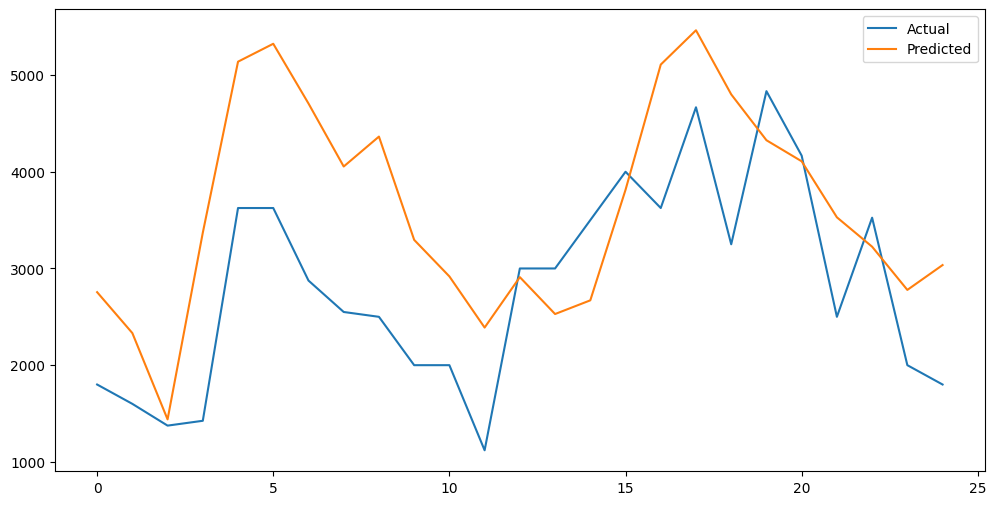

In [ ]:
y_true = test['y'].values
y_pred = prediction['yhat'].values


plt.figure(figsize=(12, 6))
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
mape = mean_absolute_percentage_error(y_true, y_pred)
print("MAPE:", mape)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=test['ds'].values, y=y_true, name="actual targets"),)
    #secondary_y=False,)
fig.add_trace(
    go.Scatter(x=test['ds'].values, y=y_pred, name="predicted targets"),)
    #secondary_y=True,)
fig.add_trace(go.Scatter(x=finaldf['ds'].values, y=finaldf['y'].values, name="original data"),)
    #secondary_y=True,)
fig.update_layout(
    title_text="Actual vs Predicted Targets")
fig.update_xaxes(title_text="Timeline")
fig.update_yaxes(title_text="actual targets", secondary_y=False)
fig.update_yaxes(title_text="predicted targets", secondary_y=True)
fig.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu8emikwo/hjzjq3ce.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu8emikwo/8fnpmr42.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13152', 'data', 'file=/tmp/tmpu8emikwo/hjzjq3ce.json', 'init=/tmp/tmpu8emikwo/8fnpmr42.json', 'output', 'file=/tmp/tmpu8emikwo/prophet_model5z3kxail/prophet_model-20230710124052.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:40:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


98
(98, 3)
(25, 3)


12:40:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 1226.624
MAPE: 0.5381257986683984


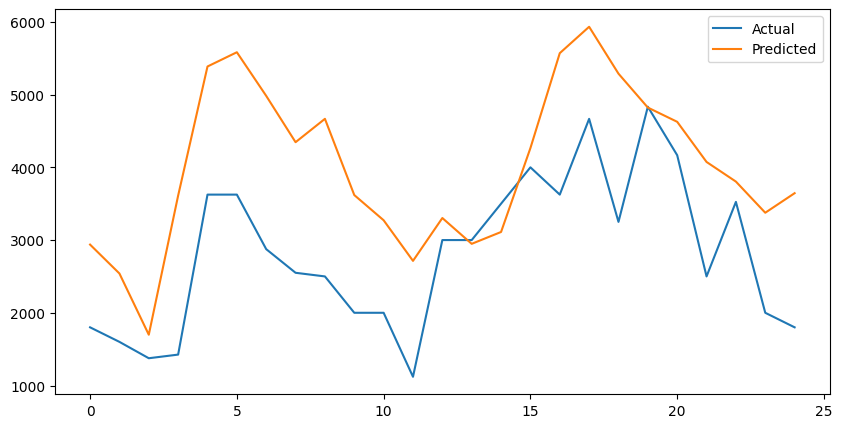

In [ ]:
#Trial 2

# splitting train and test data
trainDataSize = 0.80
splitSize = int(finaldf.shape[0]*trainDataSize)
print(splitSize)
train = finaldf[0:splitSize]
test = finaldf[splitSize:]
print(train.shape)
print(test.shape)
prophetColumns =['Arrival Quantity']
# model

#seasonality_mode = 'multiplicative'

#modelWeekly = Prophet(changepoint_range=0.90,changepoint_prior_scale = 0.5)

model = Prophet(changepoint_range=0.95,changepoint_prior_scale = 1,)#seasonality_prior_scale=20)

# adding all columns in add regressor
for col in prophetColumns:
    model.add_regressor(col)
#training model
model.fit(train)

future =test.copy()
future.drop('y',axis=1,inplace=True)

#prediction
prediction = model.predict(future)

y_true = test['y'].values
y_pred = prediction['yhat'].values


plt.figure(figsize=(10, 5))
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
mape = mean_absolute_percentage_error(y_true, y_pred)
print("MAPE:", mape)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# with extreme weather and 80% train data, seasonality mode mulitplicative
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=test['ds'].values, y=y_true, name="actual targets"),)
    #secondary_y=False,)
fig.add_trace(
    go.Scatter(x=test['ds'].values, y=y_pred, name="predicted targets"),)
    #secondary_y=True,)
fig.add_trace(go.Scatter(x=finaldf['ds'].values, y=finaldf['y'].values, name="original data"),)
    #secondary_y=True,)
fig.update_layout(
    title_text="Actual vs Predicted Targets")
fig.update_xaxes(title_text="Timeline")
fig.update_yaxes(title_text="actual targets", secondary_y=False)
fig.update_yaxes(title_text="predicted targets", secondary_y=True)
fig.show()

In [ ]:
def model_prophet(Prophetdf,n_obs= 117):

    Prophetdf_train=Prophetdf[0:n_obs]
    Prophetdf_test =Prophetdf[n_obs:]
    multi_model = Prophet(interval_width = 0.95)
    Prophet_cols = Prophetdf.columns.tolist()
    Prophet_cols.remove('ds')
    Prophet_cols.remove('y')
    print(Prophetdf_train.columns)
    #print(Prophetdf_test[['ds','y']])

    # adding all columns in add regressor
    for col in Prophet_cols:
        multi_model.add_regressor(col)


    multi_model.fit(Prophetdf_train)
    print('Prophetdf_test.shape[0]')
    print(Prophetdf_test.shape[0])
    # make furture frame
    future = multi_model.make_future_dataframe(periods = Prophetdf_test.shape[0],freq='MS', include_history=True)
    for col in Prophet_cols:
        future[col] =Prophetdf[col]
    print(Prophetdf_test[['ds','y']])
    print('future')
    print(future)

    # predict future
    forecastProphet =  multi_model.predict(future)
    combined_df = pd.merge(Prophetdf_test[['ds','y']],forecastProphet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

    print(forecastProphet[['ds','yhat', 'yhat_lower','yhat_upper']].tail())

    fig1 = multi_model.plot(forecastProphet)

    Prophetdf.plot(x = 'ds', y = 'y')

    multi_model.plot_components(forecastProphet);


    #print(Prophetdf_test[['ds','y']])
    print(forecastProphet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-6:])

    combined_df = pd.merge(Prophetdf_test[['ds','y']],forecastProphet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-6:], on='ds')
    #print(combined_df.head())


    #Check MAE value
    MAE = mean_absolute_error(combined_df['y'], combined_df['yhat'])
    print('MAE')
    print(MAE)

#Check MAPE value
    MAPE = mean_absolute_percentage_error(combined_df['y'], combined_df['yhat'])
    print('MAPE')
    print(MAPE)

    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.rcParams.update({'figure.figsize':  (15, 3),  'figure.dpi' : 300})
    fig, ax = plt.subplots()

    sns.lineplot(data = Prophetdf , x = 'ds', y = 'y' ,label = 'Original')
    sns.lineplot(data= forecastProphet, x = 'ds', y = 'yhat', label = 'Forecast')
    plt.grid(linestyle = '-', linewidth = 0.3)

    plt.legend(["Original","forecast"])


    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.rcParams.update({'figure.figsize':  (15, 3),  'figure.dpi' : 300})
    fig, ax = plt.subplots()
    sns.lineplot(data = Prophetdf[-6:] , x = 'ds', y = 'y' ,label = 'Original')
    sns.lineplot(data= forecastProphet[-6:], x = 'ds', y = 'yhat', label = 'Forecast')
    plt.grid(linestyle = '-', linewidth = 0.3)
    plt.legend(["Original","forecast"])



    return MAE

In [ ]:
finaldf.loc[:,'Arrival Quantity'].iplot()

In [ ]:
# finaldf[finaldf.loc[:,'Arrival Quantity']==0]

In [ ]:
finaldf.head()

Arrival Quantity       y         ds
0         35.333333  1000.0 2010-02-01
1        103.500000   650.0 2010-03-01
2         27.750000  1200.0 2010-04-01
3         25.333333  1150.0 2010-05-01
4         26.666667  1325.0 2010-06-01

In [ ]:
finaldf1.head()

Arrival Quantity_mean       y         ds
0              28.930247  1000.0 2010-02-01
1              38.598925   650.0 2010-03-01
2              24.417204  1200.0 2010-04-01
3              22.165054  1150.0 2010-05-01
4              19.596237  1325.0 2010-06-01

In [ ]:
#HERE we can see that MAE for arrival quantity mean(588.439) resampling is significantly less than that calculated using max resampling(608.916)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu8emikwo/izs3a1rz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu8emikwo/b_md2dlt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60504', 'data', 'file=/tmp/tmpu8emikwo/izs3a1rz.json', 'init=/tmp/tmpu8emikwo/b_md2dlt.json', 'output', 'file=/tmp/tmpu8emikwo/prophet_modeli7du5l4a/prophet_model-20230710124053.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Index(['Arrival Quantity', 'y', 'ds'], dtype='object')
Prophetdf_test.shape[0]
6
            ds            y
117 2019-11-01  4833.333333
118 2019-12-01  4166.666667
119 2020-01-01  2500.000000
120 2020-02-01  3525.000000
121 2020-03-01  2000.000000
122 2020-04-01  1800.000000
future
            ds  Arrival Quantity
0   2010-02-01         35.333333
1   2010-03-01        103.500000
2   2010-04-01         27.750000
3   2010-05-01         25.333333
4   2010-06-01         26.666667
..         ...               ...
118 2019-12-01         59.000000
119 2020-01-01         60.250000
120 2020-02-01         58.250000
121 2020-03-01         51.500000
122 2020-04-01         50.333333

[123 rows x 2 columns]
            ds         yhat   yhat_lower   yhat_upper
118 2019-12-01  3836.227645  2144.556853  5380.080407
119 2020-01-01  2846.178883  1109.711136  4532.015013
120 2020-02-01  2585.251157   885.806208  4207.919804
121 2020-03-01  2097.987870   505.161182  3770.135337
122 2020-04-01  2567.50083

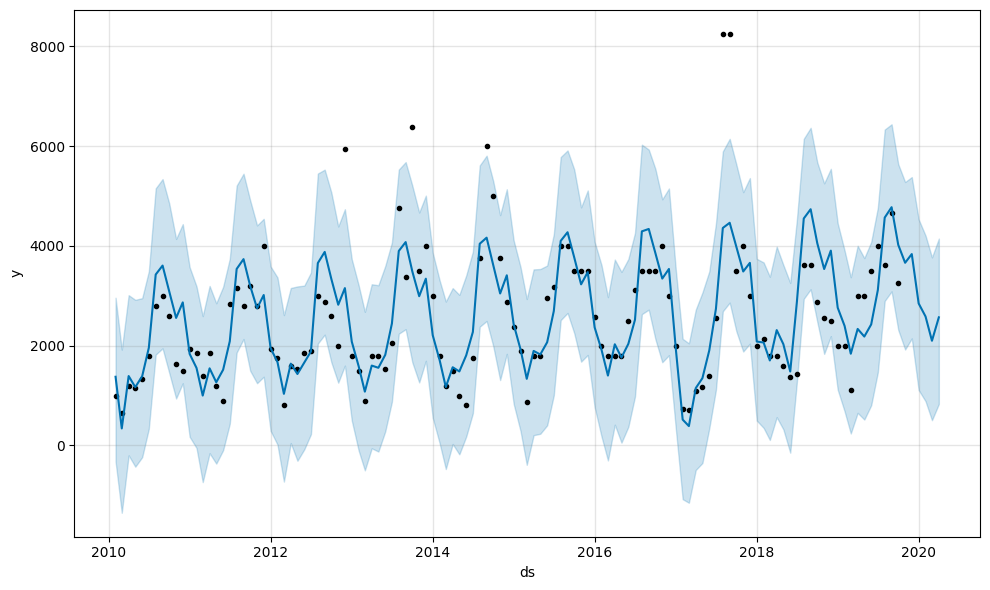

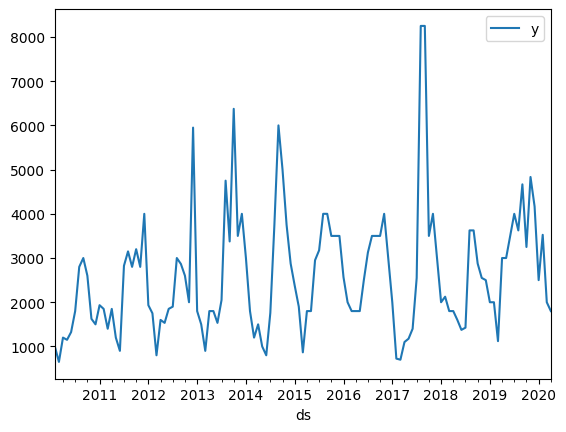

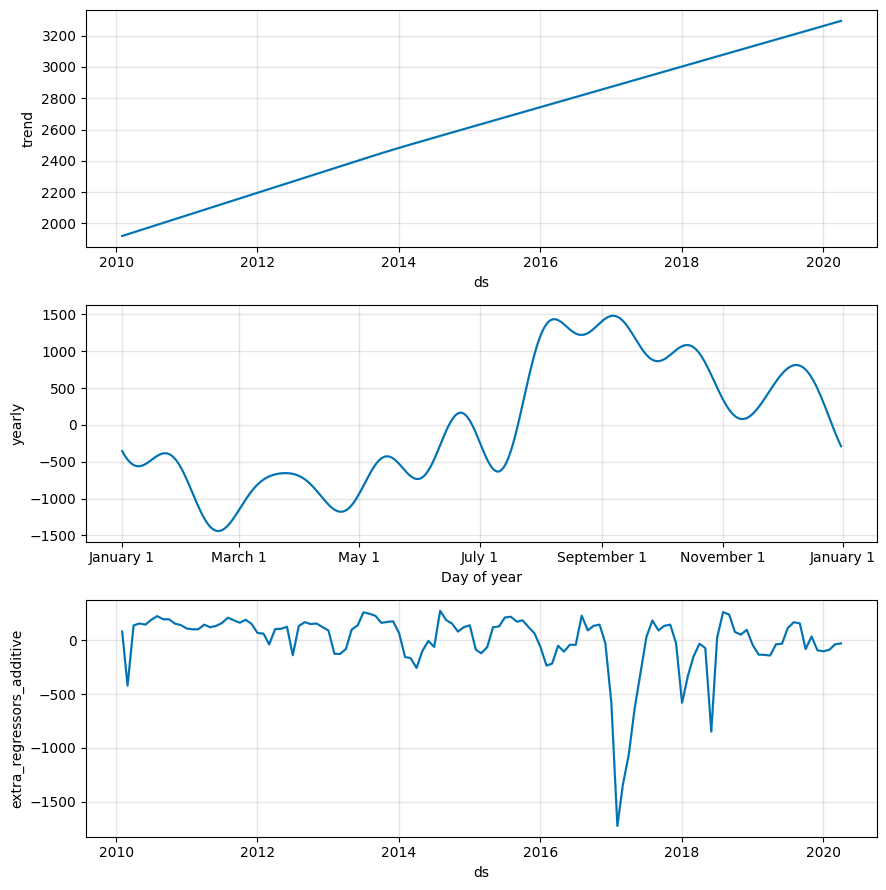

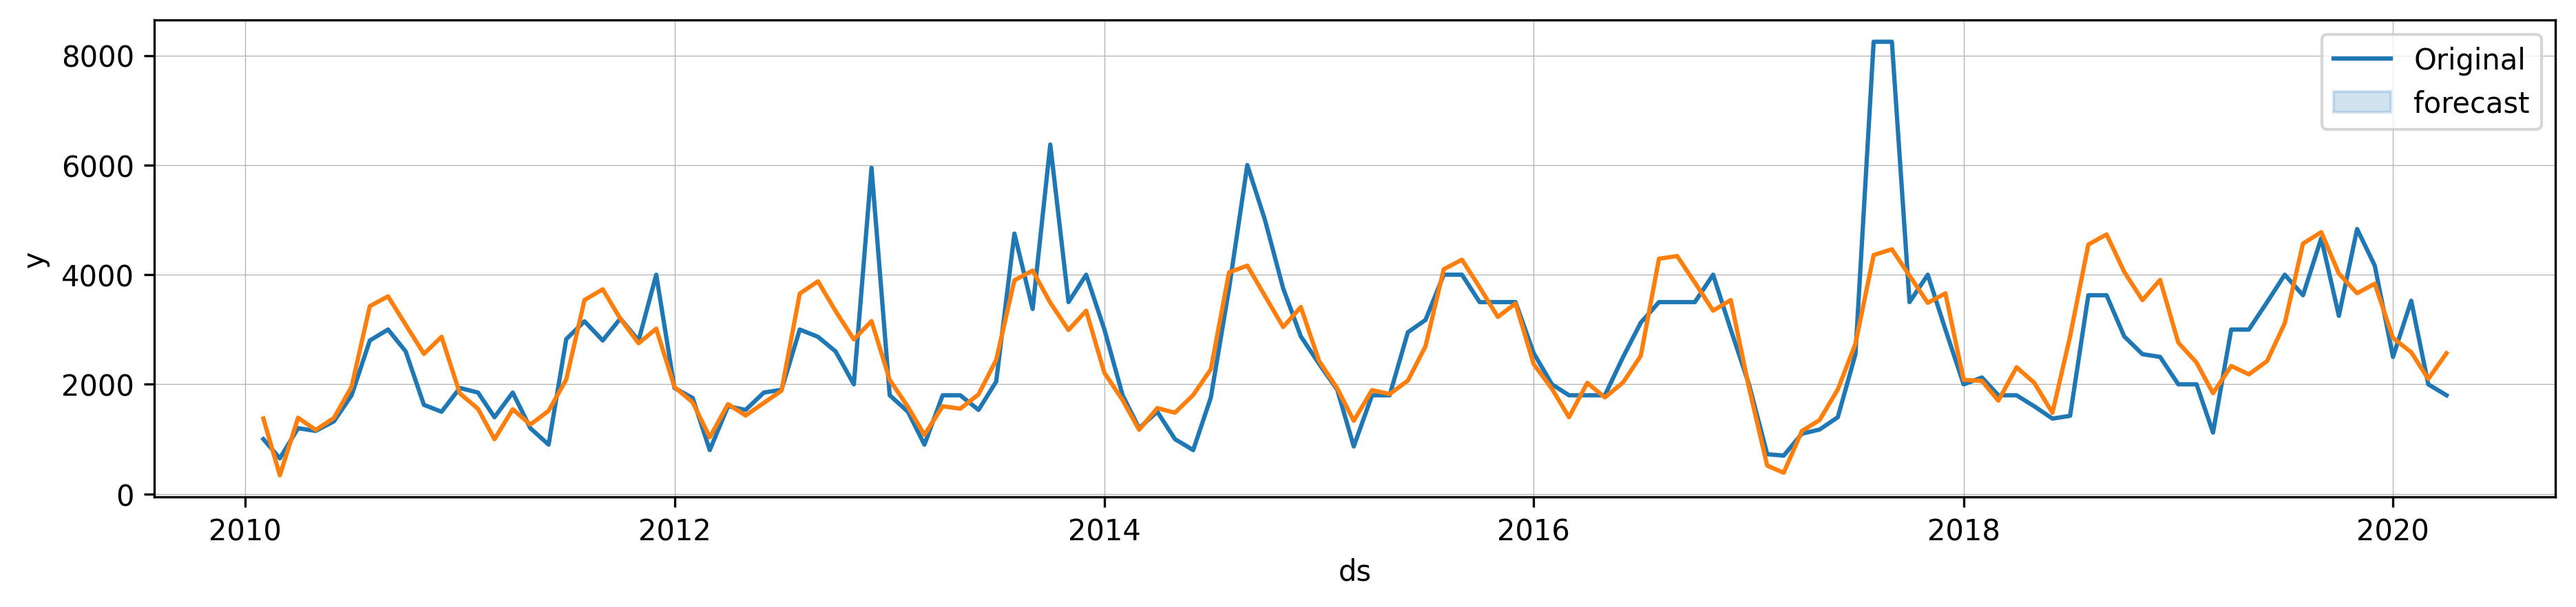

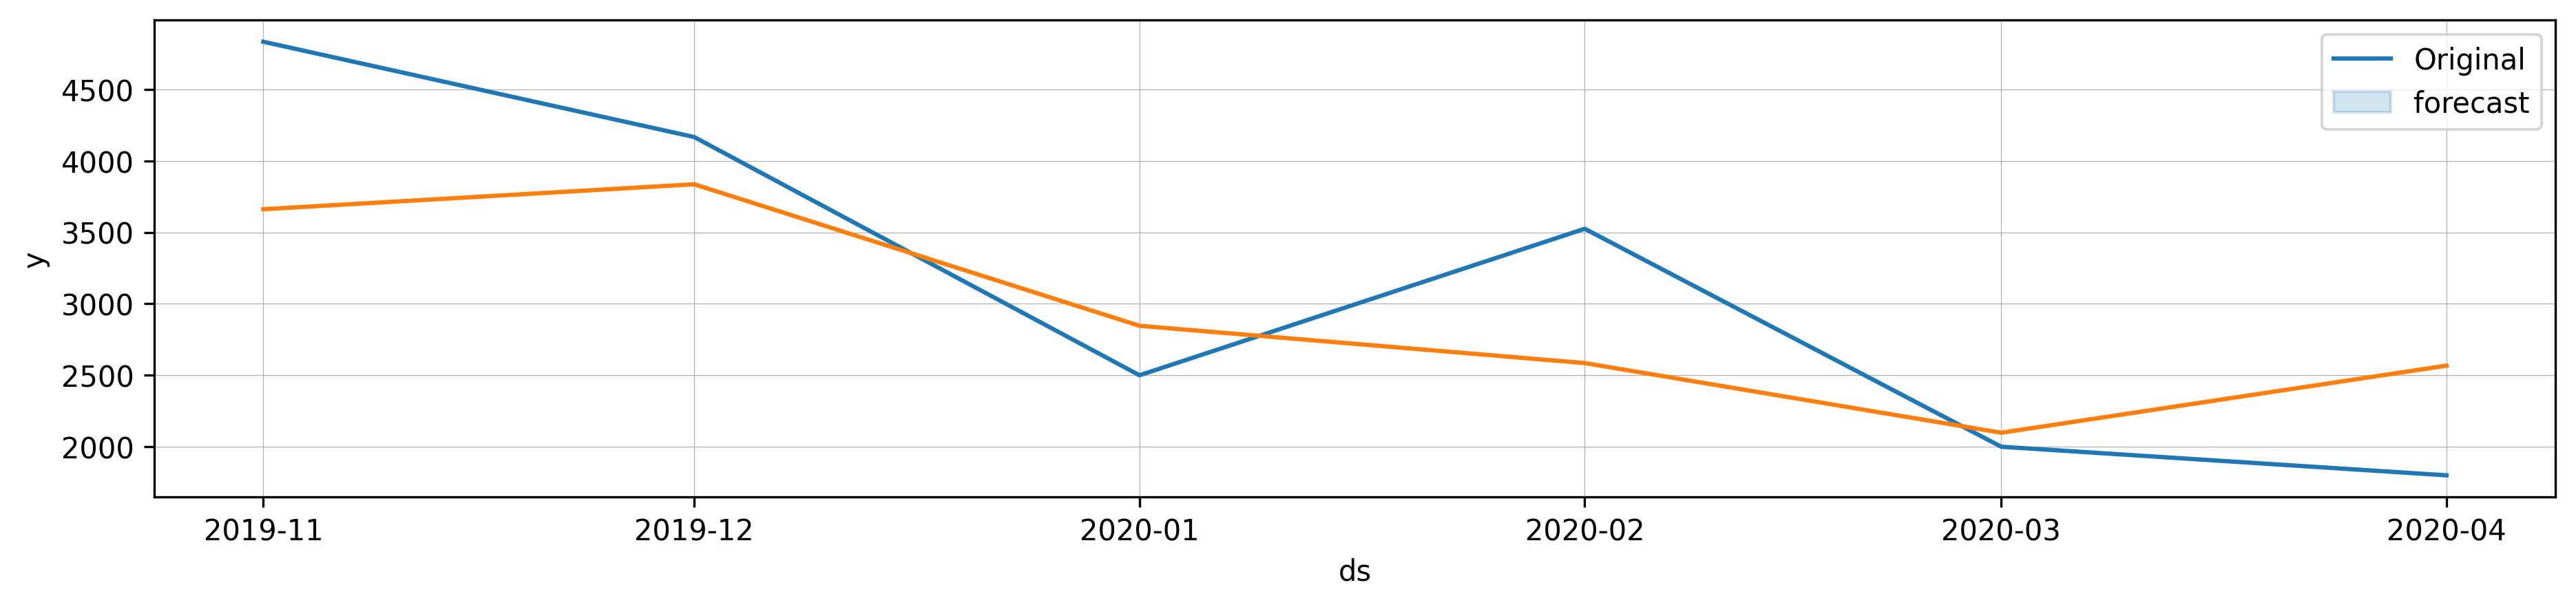

In [ ]:
MAE_Prophet = model_prophet(finaldf)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu8emikwo/0xe2tet2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu8emikwo/zbmsxyp6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59769', 'data', 'file=/tmp/tmpu8emikwo/0xe2tet2.json', 'init=/tmp/tmpu8emikwo/zbmsxyp6.json', 'output', 'file=/tmp/tmpu8emikwo/prophet_modelm89seimv/prophet_model-20230710124055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Index(['Arrival Quantity_mean', 'y', 'ds'], dtype='object')
Prophetdf_test.shape[0]
6
            ds            y
117 2019-11-01  4833.333333
118 2019-12-01  4166.666667
119 2020-01-01  2500.000000
120 2020-02-01  3525.000000
121 2020-03-01  2000.000000
122 2020-04-01  1800.000000
future
            ds  Arrival Quantity_mean
0   2010-02-01              28.930247
1   2010-03-01              38.598925
2   2010-04-01              24.417204
3   2010-05-01              22.165054
4   2010-06-01              19.596237
..         ...                    ...
118 2019-12-01              49.034409
119 2020-01-01              54.111828
120 2020-02-01              47.337097
121 2020-03-01              45.718280
122 2020-04-01              40.732258

[123 rows x 2 columns]
            ds         yhat   yhat_lower   yhat_upper
118 2019-12-01  3790.634668  2133.615319  5485.111483
119 2020-01-01  2772.798867  1229.817151  4367.870958
120 2020-02-01  2547.648278   900.176316  4331.447359
121 2020-03-01 

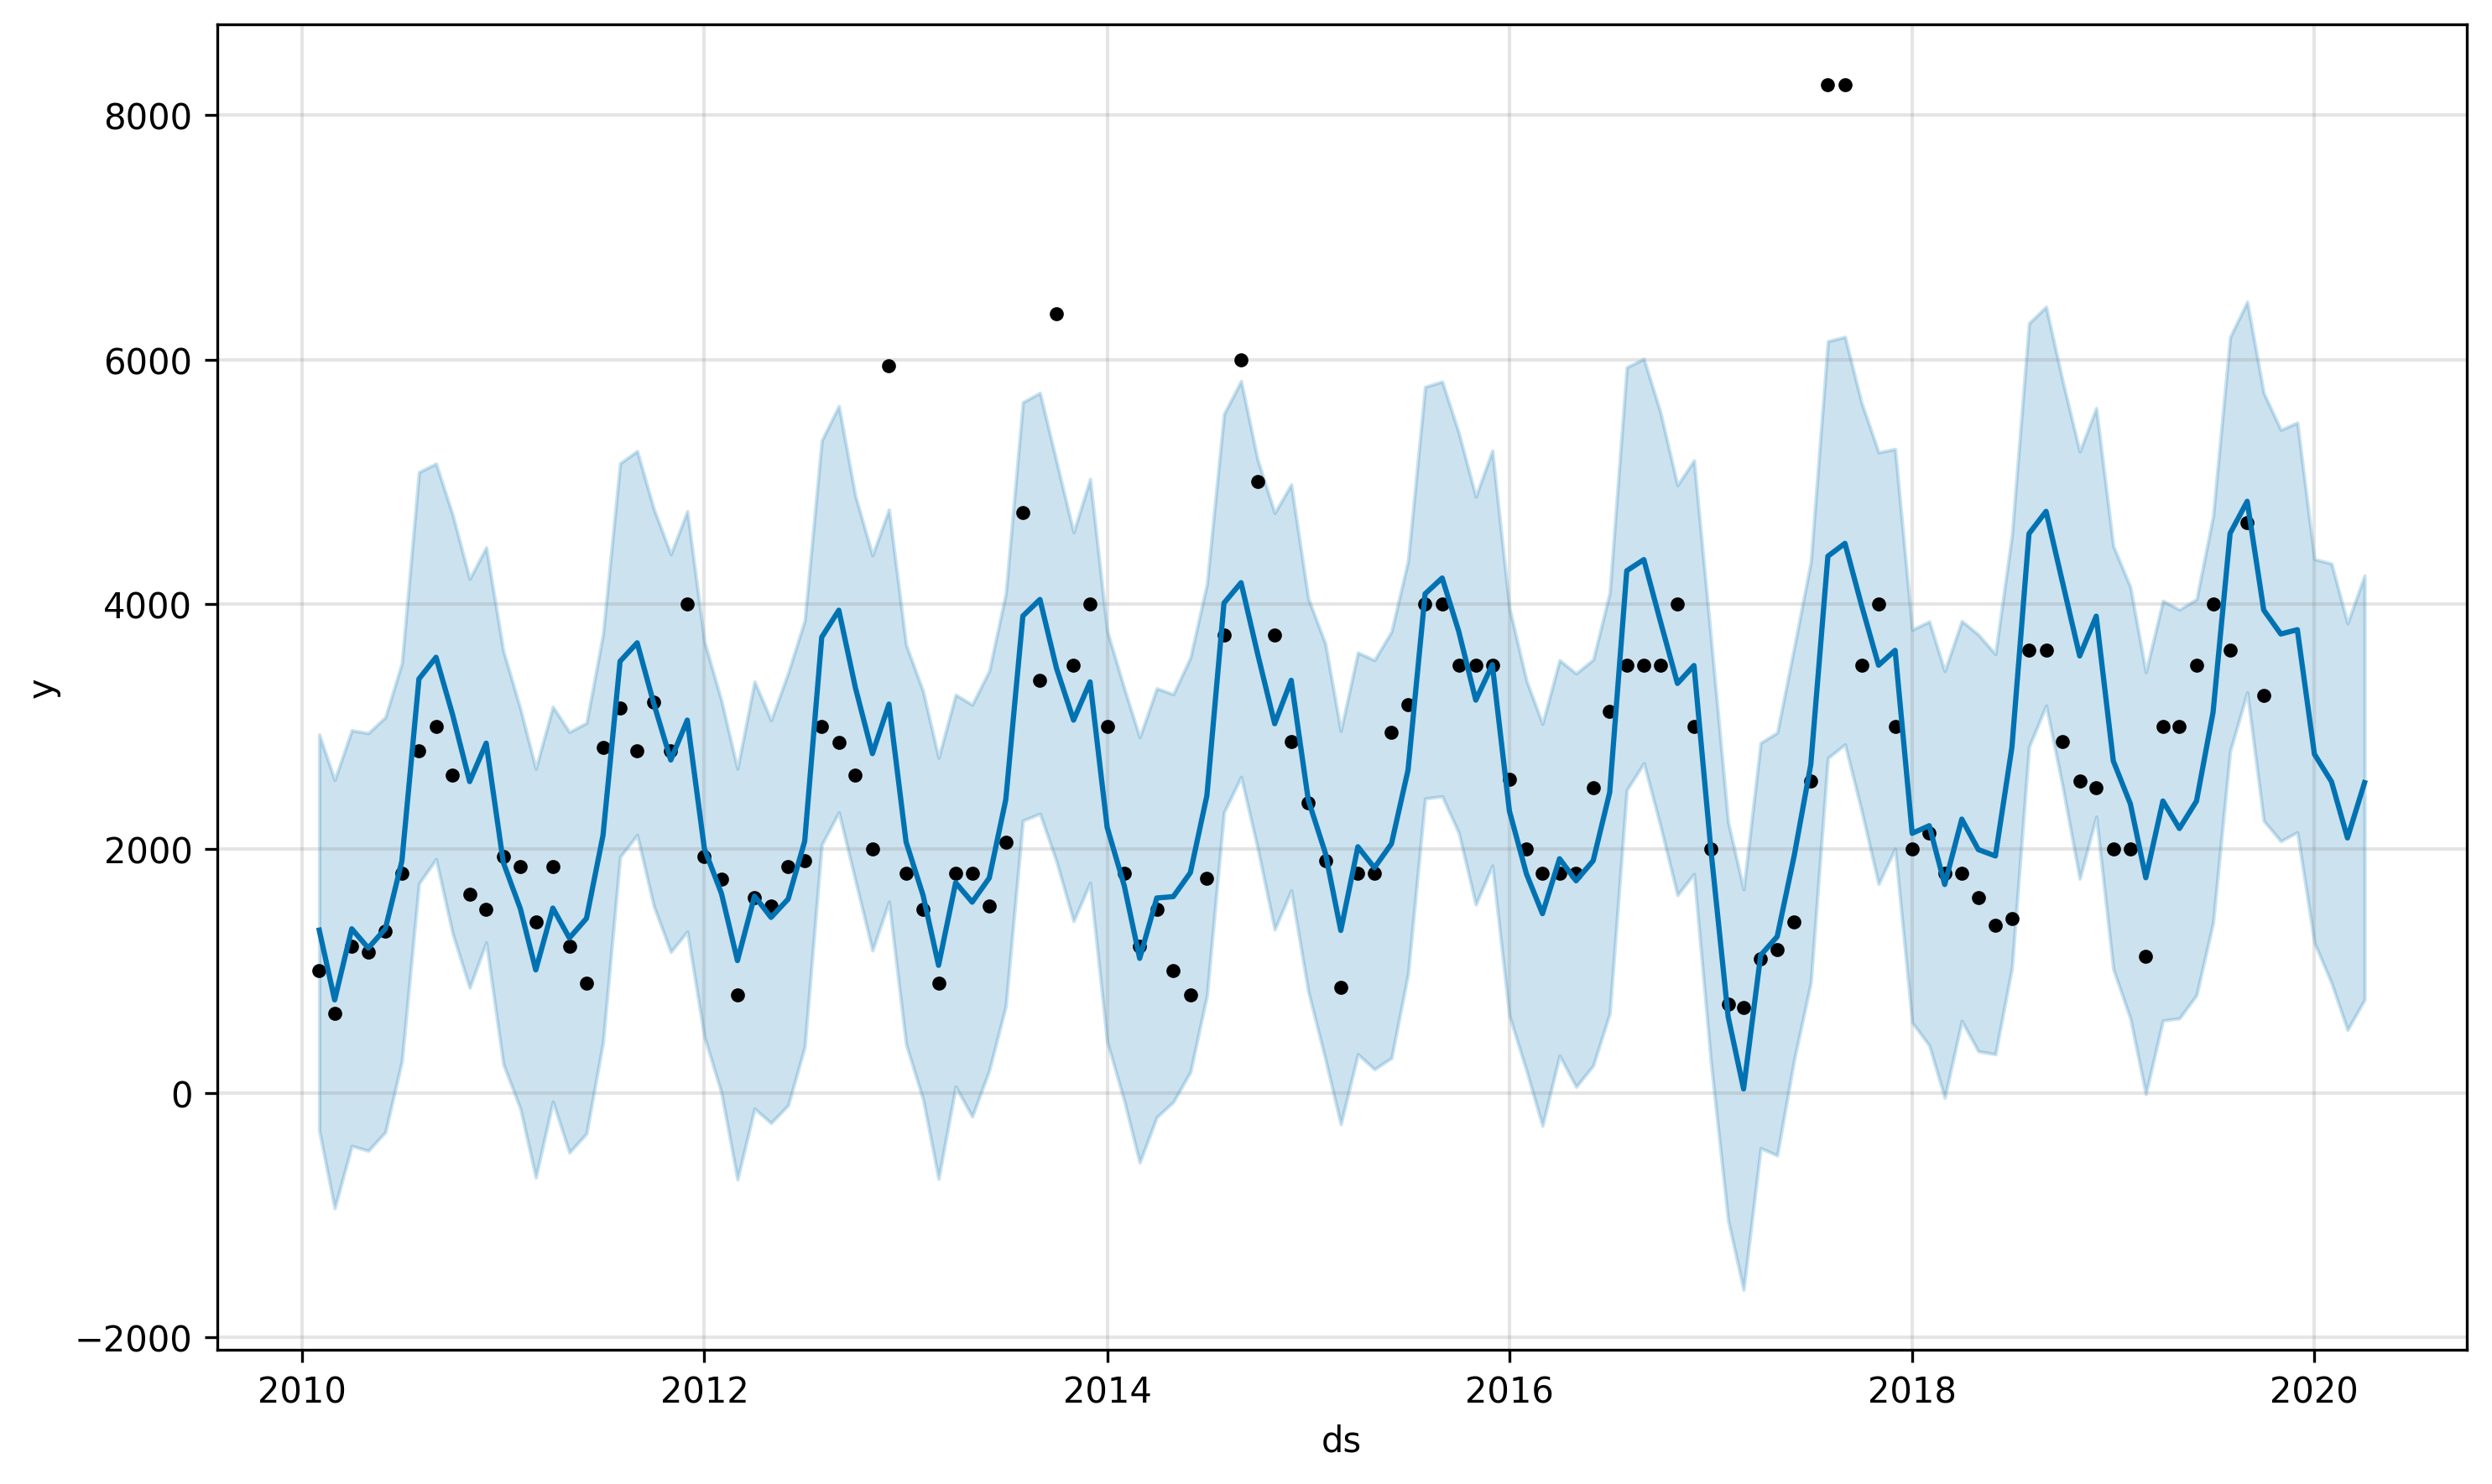

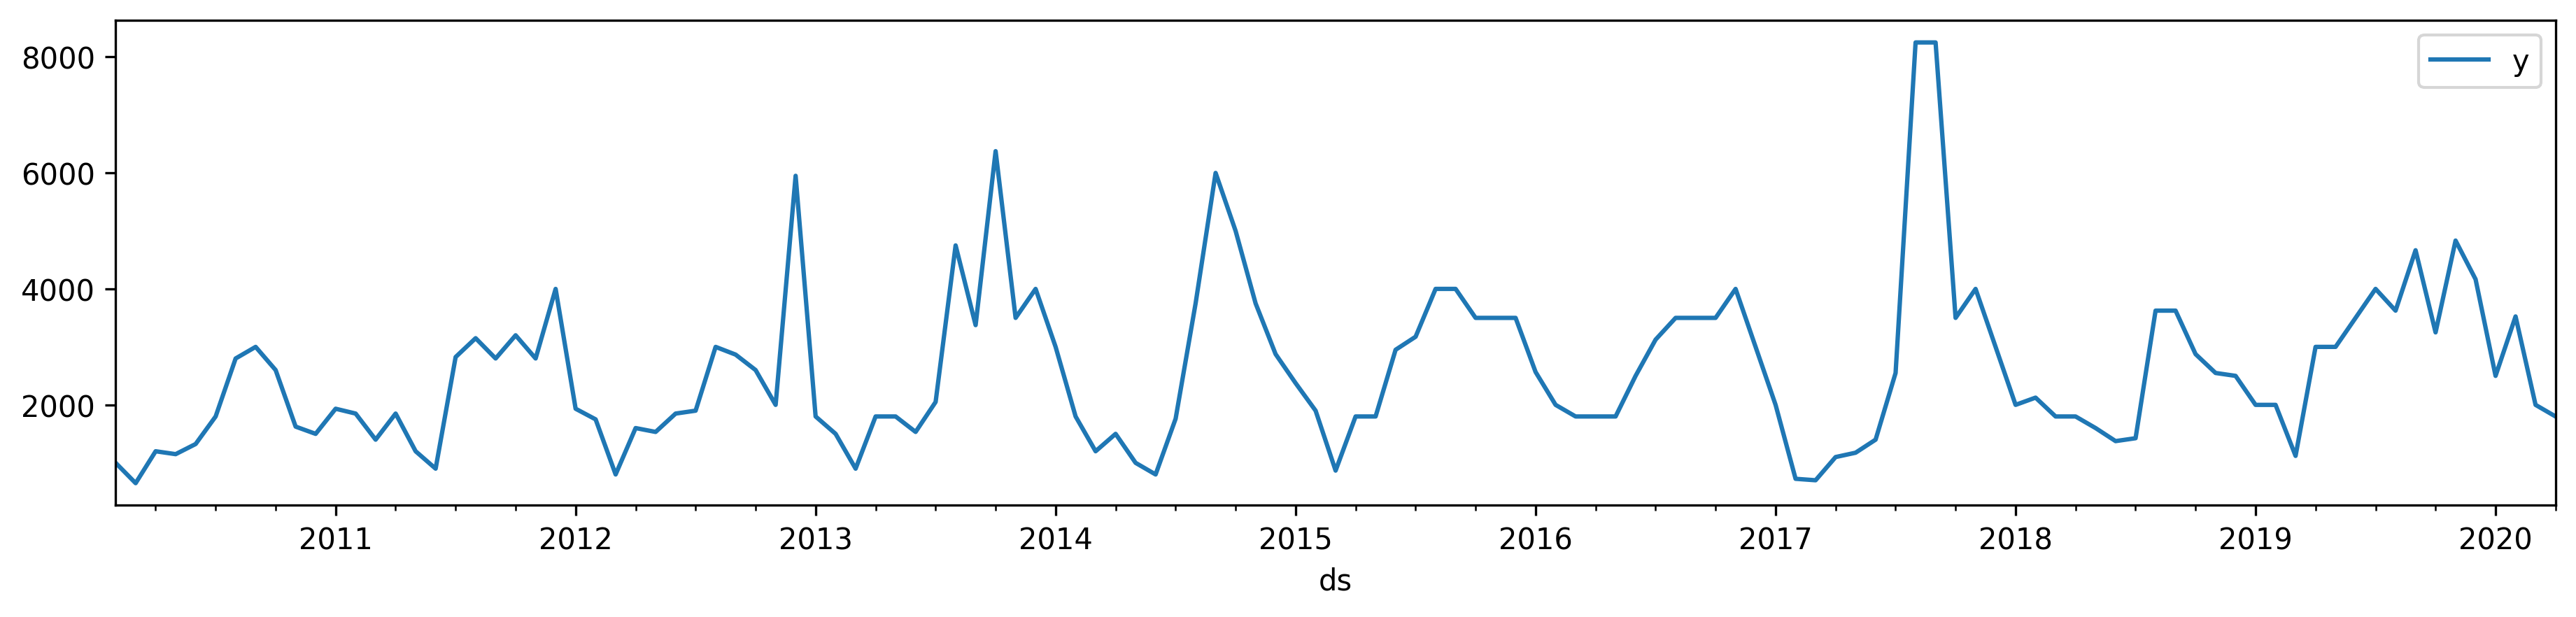

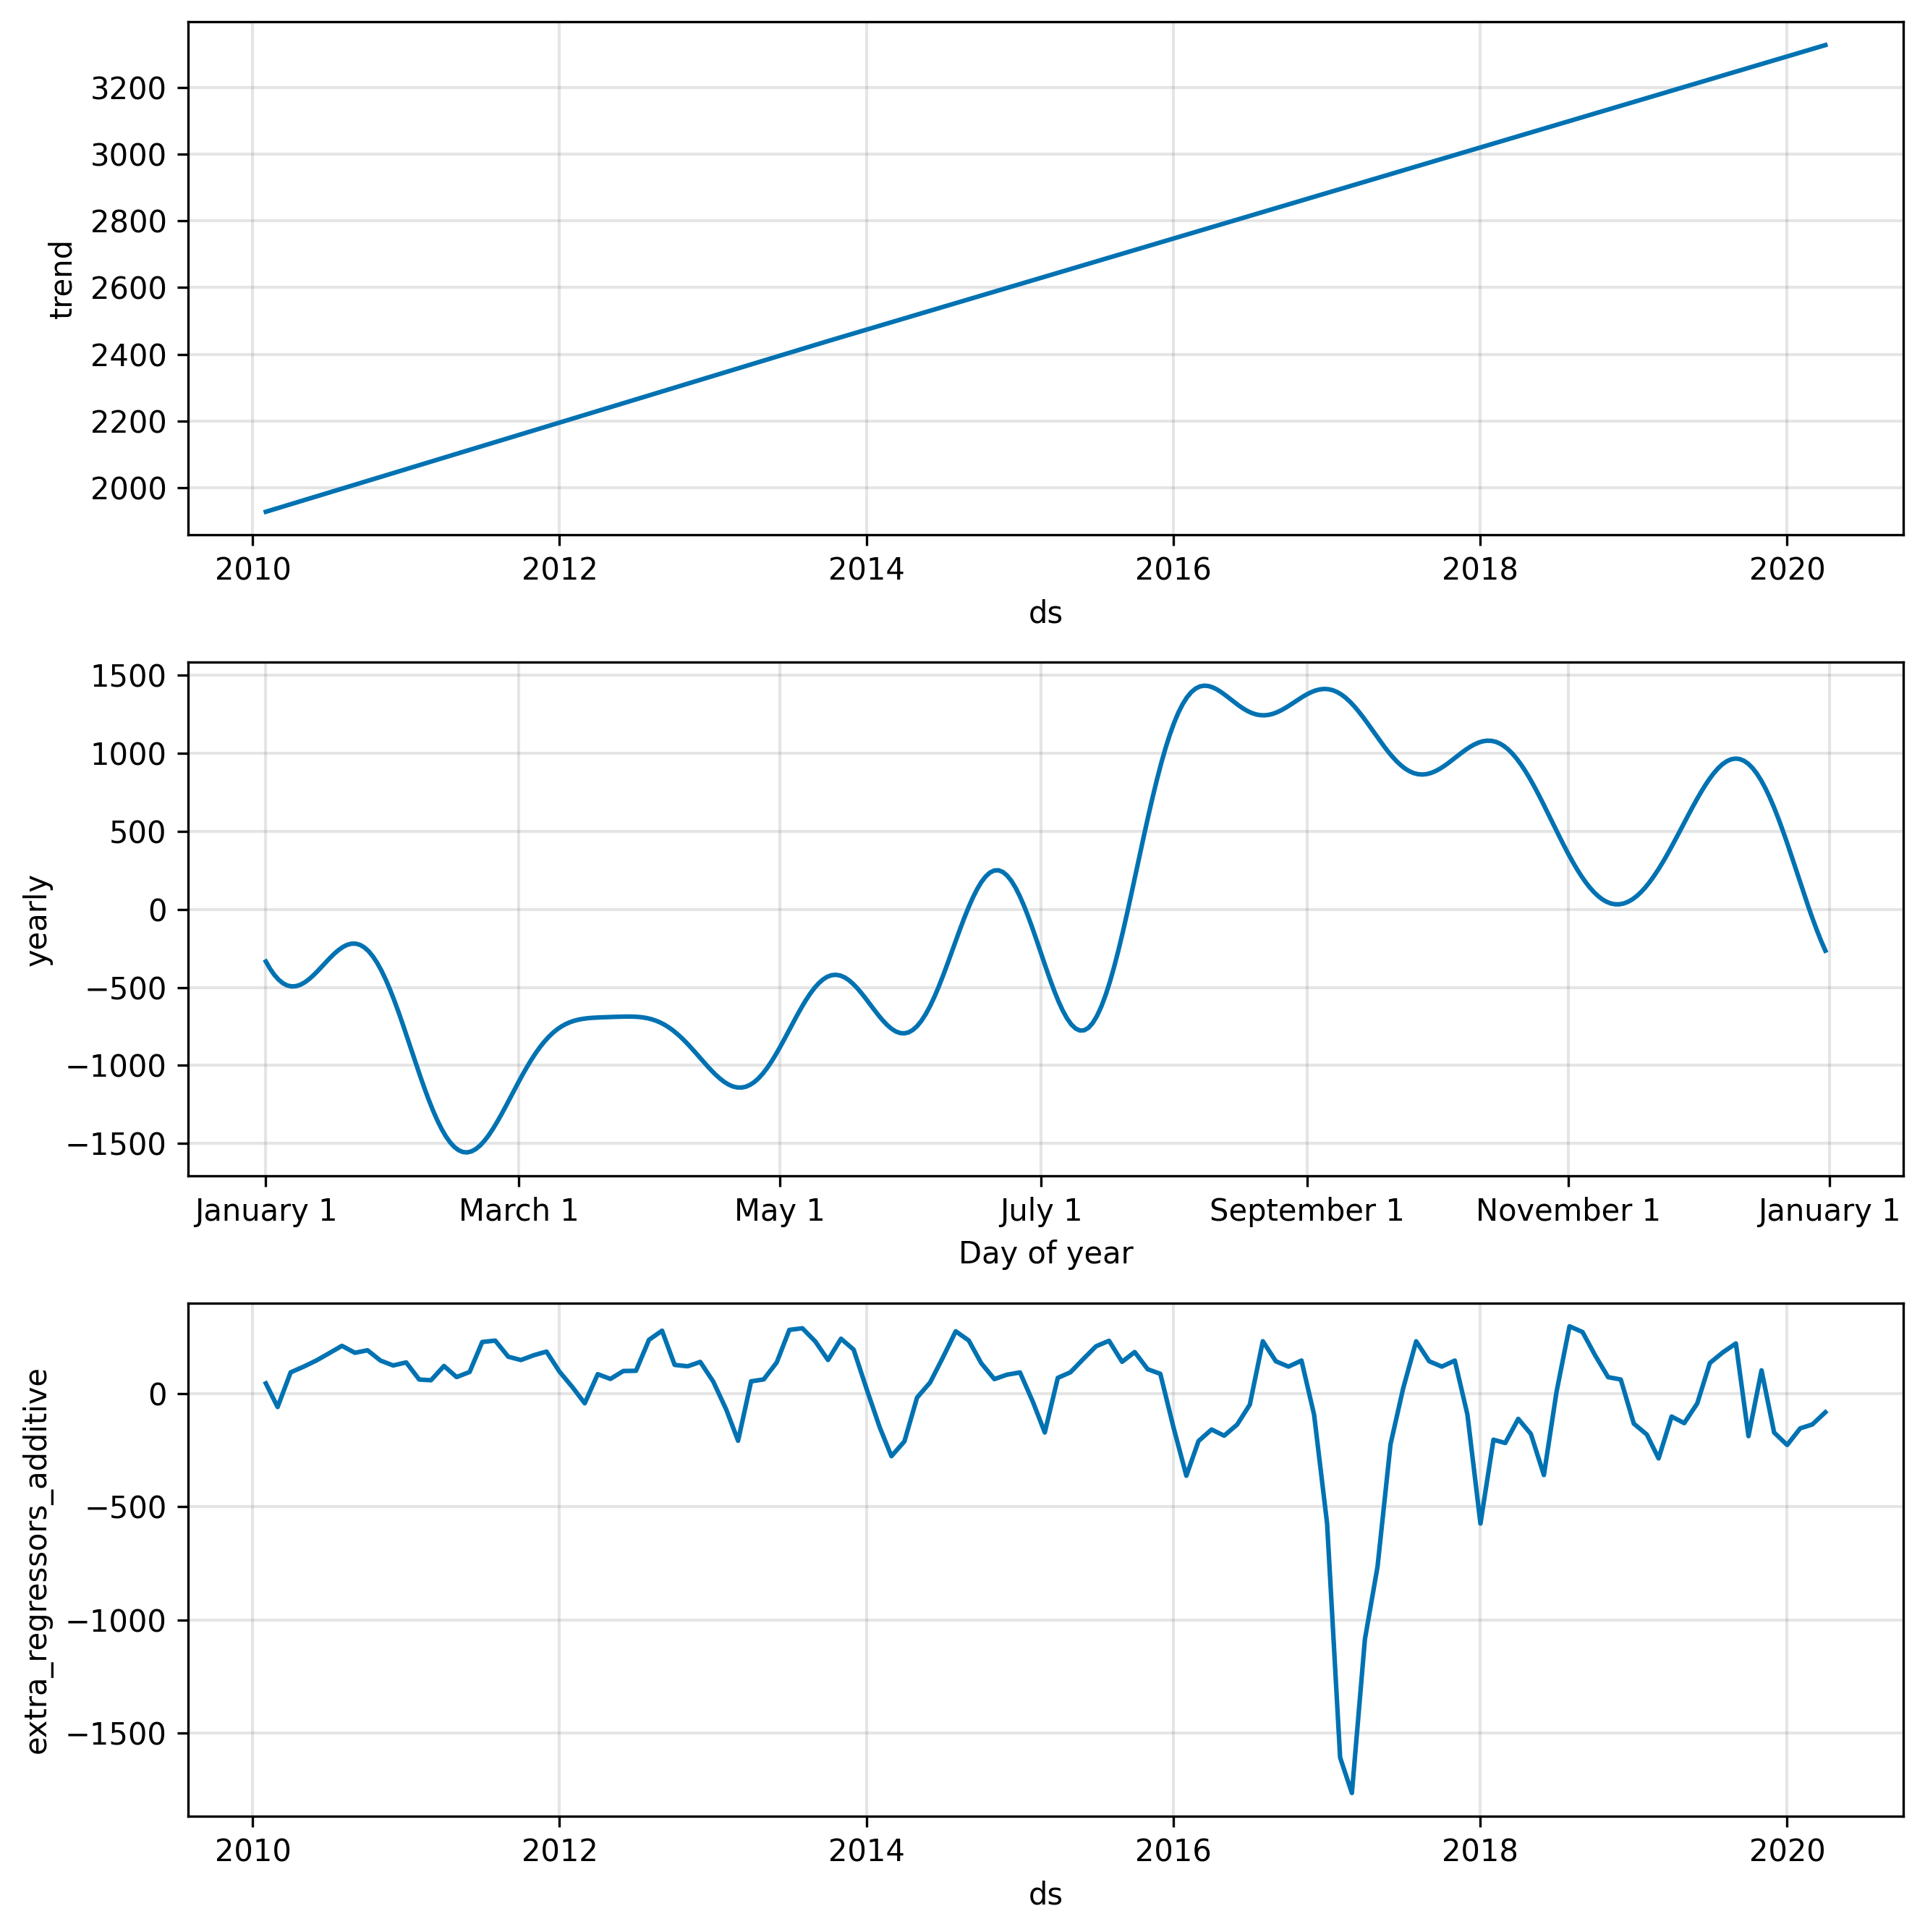

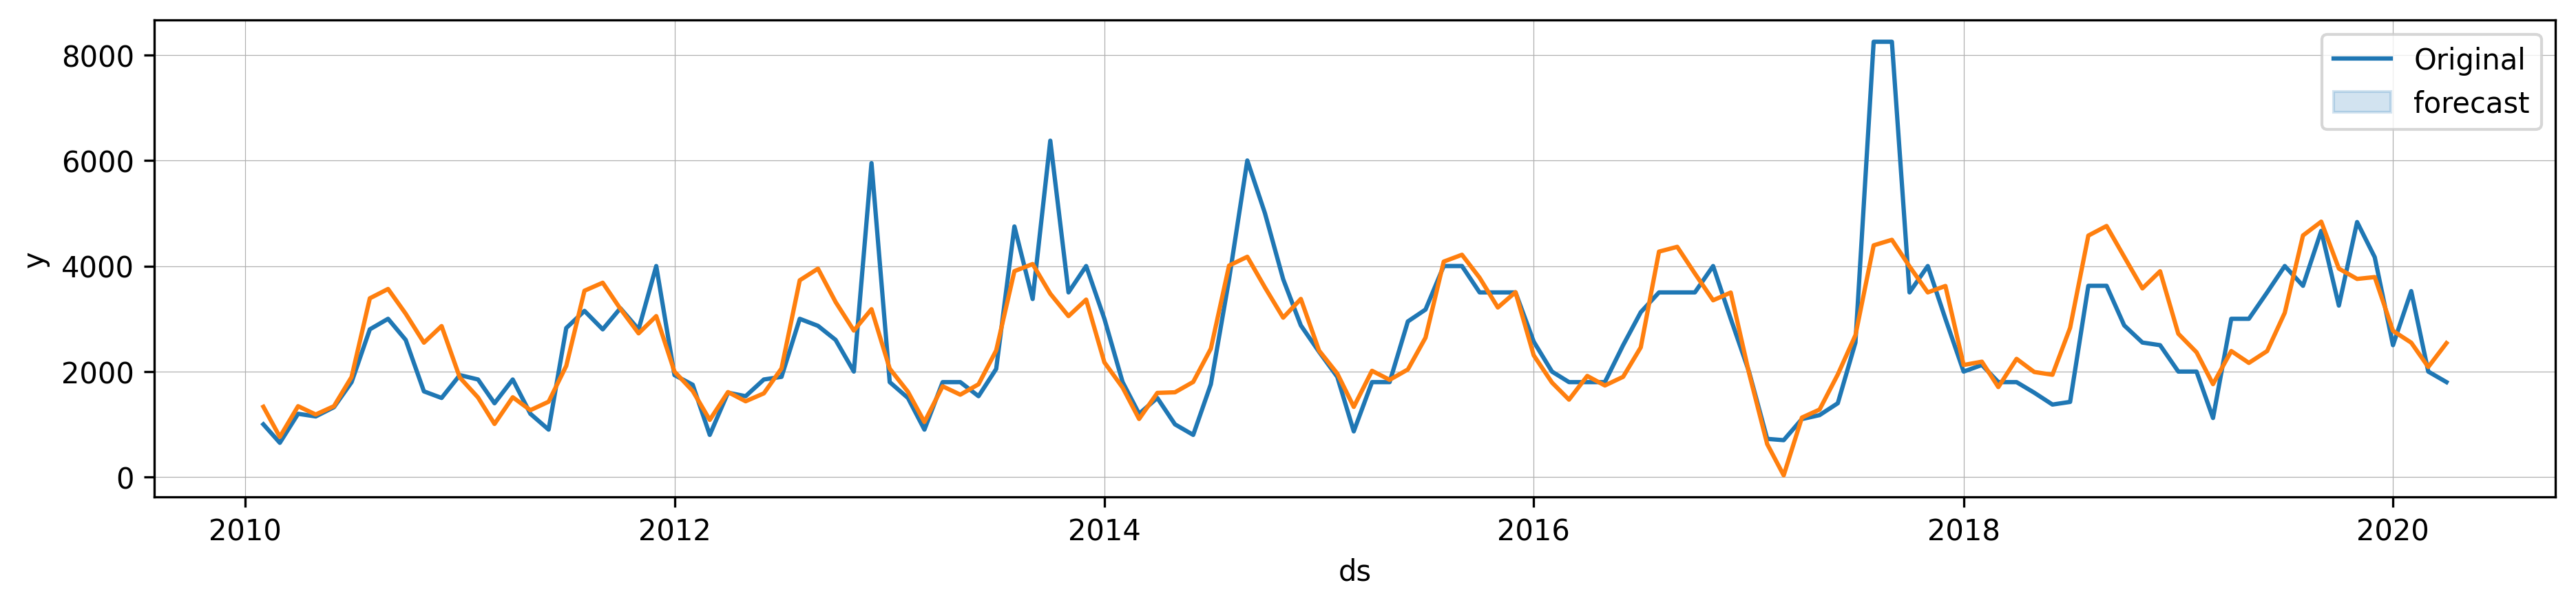

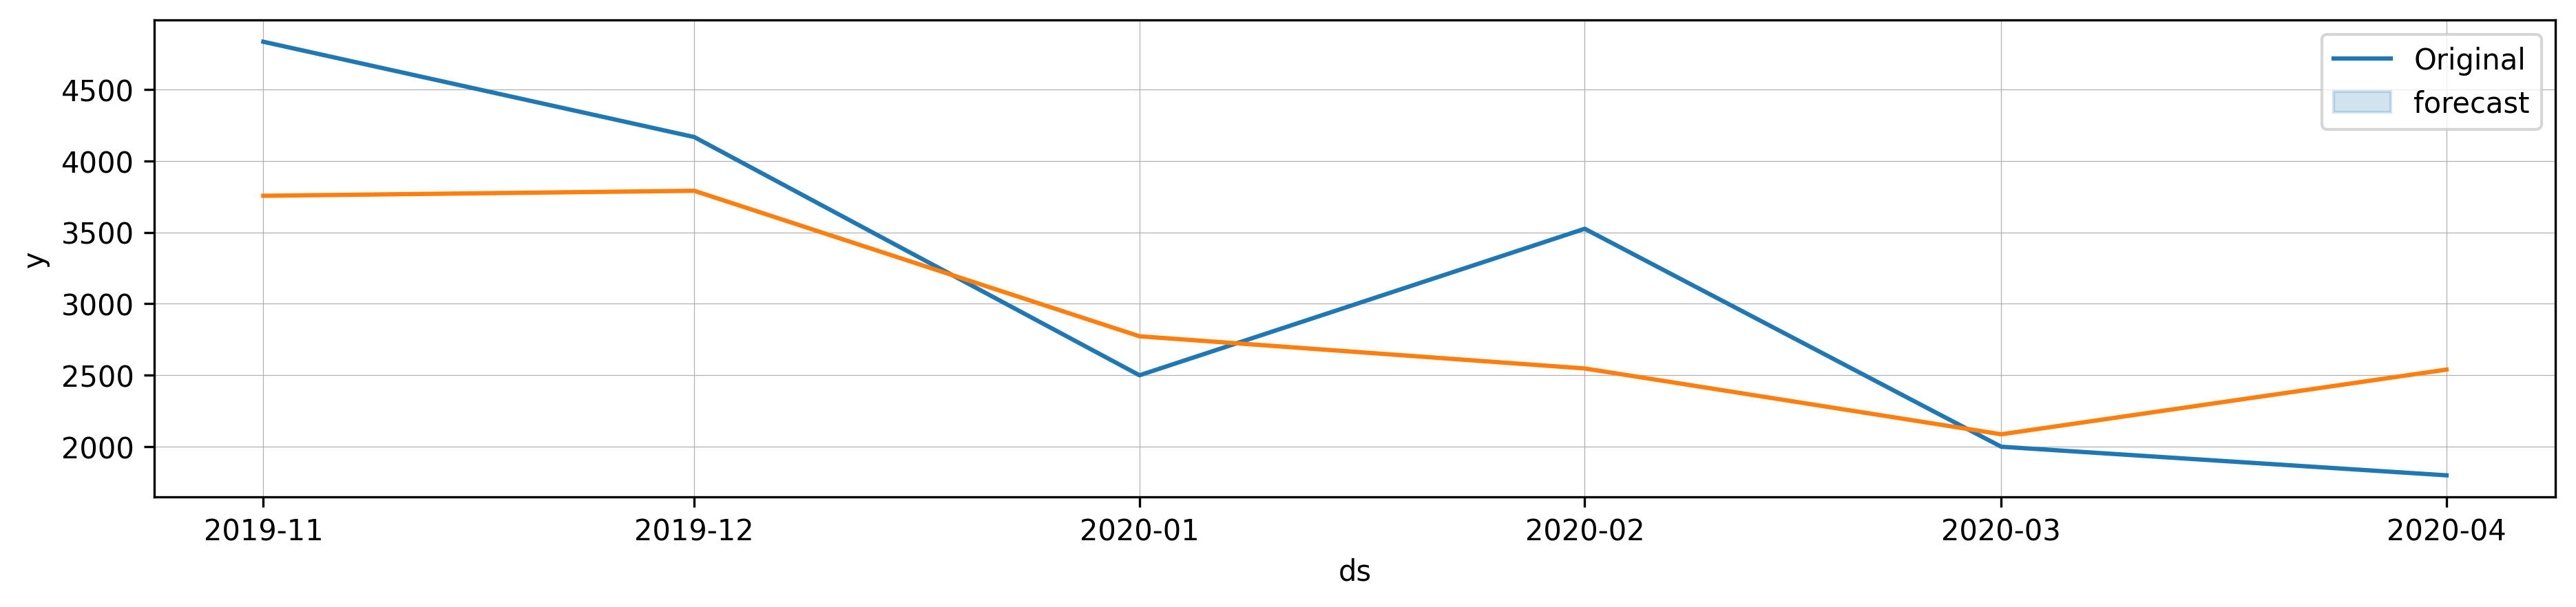

In [ ]:
MAE_Prophet_1=model_prophet(finaldf1)
